<h1 style='color: green; font-size: 30px; font-weight: bold;'>Case: Analise e-commerce brasileiro</h1>

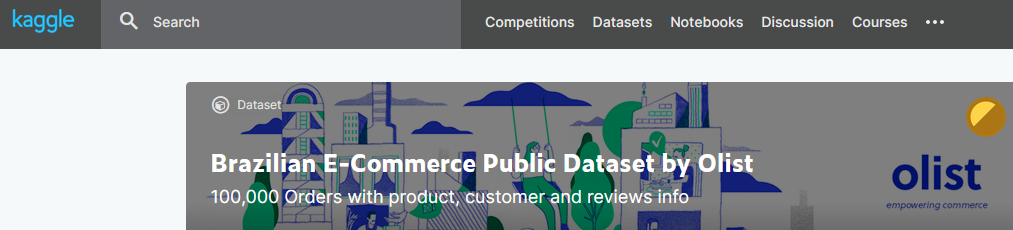

In [1]:
from IPython.display import Image
Image("C:/Users/Administrador/Desktop//Kaggle/Dados/img/olist.png")

# <font color='red' style='font-size: 16px;'>Link para o dataset https://www.kaggle.com/olistbr/brazilian-ecommerce/download</font>
<hr style='border: 2px solid red;'>

## bibliotecas usadas atualmente

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
import random as rnd
import plotly.express as px


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
#conda install geopandas

## Sobre o case
### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Dataset coletado do Kaggle, com informações de empresas varejsitas no Brasil </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso case é fazer uma análise estatística e preditiva segundos os dados de grandes varejistas.</p>


### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos datasets

In [5]:
dados_customers = pd.read_csv('customers_dataset.csv')
#                                                    #
dados_sellers = pd.read_csv('sellers_dataset.csv')
#                                                    #
dados_geolocation = pd.read_csv('geolocation_dataset.csv')
#                                                    #
dados_order_review = pd.read_csv('order_reviews_dataset.csv')
#                                                    #
dados_orders = pd.read_csv('orders_dataset.csv')
#                                                    #
dados_order_payments = pd.read_csv('order_payments_dataset.csv')
#                                                    #
dados_order_items = pd.read_csv('order_items_dataset.csv')
#                                                    #
dados_product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
#                                                    #
dados_products = pd.read_csv('products_dataset.csv')

## Head() dos datasets

In [6]:
#dados_customers.head()
#dados_sellers.head()
#dados_geolocation.head()
#dados_order_review.head()
#dados_orders.head()
#dados_order_payments.head()
#dados_order_items.head()
#dados_product_category_name_translation.head()
#dados_products.head()

## Head dados_geolocation

In [7]:
dados_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Identificando Vazio(dropna) ou Vazio(dropnull)

In [ ]:
dados_geolocation.isnull.sum()

#dados_geolocation.isna.sum()

In [18]:
dados_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Limpando os dados nulos em: payment_type

In [136]:
dados_order_payments_limpo = dados_order_payments.query("payment_type!='not_defined'")

In [159]:
analise_tipo_pagamento = pd.DataFrame(dados_order_payments_limpo['payment_type'].value_counts())
analise_tipo_pagamento

,payment_type
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529


In [171]:
analise_tipo_pagamento.rename(columns={'payment_type':'frequencia'},inplace=True)
analise_tipo_pagamento['tipo_pagamento'] = analise_tipo_pagamento.index
analise_tipo_pagamento

,frequencia,tipo_pagamento
credit_card,76795,credit_card
boleto,19784,boleto
voucher,5775,voucher
debit_card,1529,debit_card


In [172]:
analise_tipo_pagamento.rename(columns={'payment_type':'frequencia'},inplace=True)


In [173]:
analise_tipo_pagamento

,frequencia,tipo_pagamento
credit_card,76795,credit_card
boleto,19784,boleto
voucher,5775,voucher
debit_card,1529,debit_card


In [139]:
analise_tipo_pagamento.head()

,frequencia,tipo_pagamento
credit_card,76795,credit_card
boleto,19784,boleto
voucher,5775,voucher
debit_card,1529,debit_card


In [ ]:
analise_tipo_pagamento.info()

In [140]:
analise_tipo_pagamento.head()

,frequencia,tipo_pagamento
credit_card,76795,credit_card
boleto,19784,boleto
voucher,5775,voucher
debit_card,1529,debit_card


In [141]:
import plotly.express as px
fig = px.bar(analise_tipo_pagamento, y='frequencia', x='tipo_pagamento', width=600, height=300)
fig.update_layout(title="Análise Tipo pagamento X Frequência", title_x=0.5)
fig.show()

In [49]:
teste = dados_order_payments[['payment_installments','payment_value']]
teste.head()

,payment_installments,payment_value
0,8,99.33
1,1,24.39
2,1,65.71
3,8,107.78
4,2,128.45


In [53]:
teste.query('payment_installments=='8'')

SyntaxError: invalid syntax (<ipython-input-53-e536ba24bec4>, line 1)

In [39]:
frequencia_por_parcelas = pd.DataFrame(dados_order_payments['payment_installments'].value_counts())

In [40]:
frequencia_por_parcelas.head()

,payment_installments
1,52546
2,12413
3,10461
4,7098
10,5328


In [22]:
dados_order_payments['payment_installments'].value_counts().shape

print(("Existem {} NUMEROS DE PARCELAS").format(dados_order_payments['payment_installments'].value_counts().shape))

Existem (24,) NUMEROS DE PARCELAS


In [23]:
dados_order_payments['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [11]:

#import plotly.graph_objects as go

#labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
#values = dados_products['product_category_name']

#fig = go.Figure(dados_products=[go.Pie(labels=labels, values=values)])
#fig.show()

## Correlação dos dados (dados_order_payments)

In [24]:
dados_order_payments.corr()

,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


## Exemplo: Rename 

In [17]:
#dados_order_payments.rename(columns={"order_id": "order_id", "payment_type":"tipo_pagamento", "payment_installments":"numero_de_parcelas","payment_value":"valor_do_pagamento"}, inplace= True)
#dados_order_payments.head()

##  Exemplo: exportar Data Frame para CSV

In [ ]:
parcelas_x_valor.to_csv(r'C:\Users\Administrador\Desktop\Kaggle\Projeto\teste.csv', index = None, header=True)

## Análise de Outlier e Describe

In [ ]:
dados_order_payments.corr()

In [ ]:
dados_order_payments.cov()

In [ ]:
ax = sns.boxplot(data=dados_order_payments['numero_de_parcelas'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 4)
ax.set_title('Análise Box Plot (dados_order_payments)', fontsize=30)
ax.set_xlabel('Numero de parcelas', fontsize=20)
ax

In [ ]:
dados_order_payments.numero_de_parcelas.describe()

In [ ]:
ax = sns.boxplot(data=dados_order_payments['valor_do_pagamento'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 4)
ax.set_title('Análise Box Plot (dados_order_payments)', fontsize=30)
ax.set_xlabel('valor_do_pagamento', fontsize=20)
ax

In [ ]:
dados_order_payments.valor_do_pagamento.describe()

Text(0.5, 1.0, 'dados_order_payments')

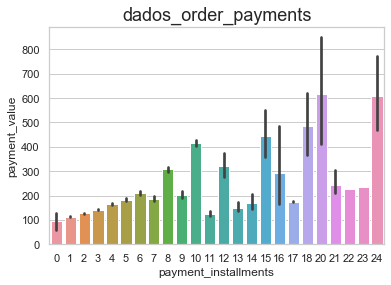

In [56]:
sns.set(style="whitegrid")
k = sns.load_dataset("tips")
ax = sns.barplot(x="payment_installments", y="payment_value", data=dados_order_payments)
ax.set_title('dados_order_payments', fontsize=18)

In [ ]:
total_por_tipo_pagamento =  dados_order_payments['tipo_pagamento'].value_counts()
print(total_por_tipo_pagamento)

In [ ]:
total_por_numero_parcelas = dados_order_payments.value_counts()
print(total_por_numero_parcelas)

In [ ]:
gui = pd.DataFrame(dados_order_payments['numero_de_parcelas'].value_counts())
gui


In [ ]:
dados_order_payments['numero_de_parcelas'].value_counts().sort_keys()


In [ ]:
dados_order_payments['numero_de_parcelas'].value_counts().shape


# <font color='blue'>dados_orders = Análise dados_geolocation</font>

In [185]:
dados_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [184]:
dados_geolocation.geolocation_state.value_counts().head()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
Name: geolocation_state, dtype: int64

In [199]:
minas = pd.DataFrame(dados_geolocation.query("geolocation_state=='MG'"))
minas.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
542189,30001,-19.923989,-43.935706,belo horizonte,MG
542190,30035,-19.901155,-43.918429,belo horizonte,MG
542191,30150,-19.922146,-43.927835,belo horizonte,MG
542192,30120,-19.919533,-43.936847,belo horizonte,MG
542193,30112,-19.937797,-43.935118,belo horizonte,MG


In [197]:
dados_geolocation.query("geolocation_state=='MG'")

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [205]:
analise_minas = pd.DataFrame(dados_geolocation.query("geolocation_state=='MG'"))
analise_minas.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
542189,30001,-19.923989,-43.935706,belo horizonte,MG
542190,30035,-19.901155,-43.918429,belo horizonte,MG
542191,30150,-19.922146,-43.927835,belo horizonte,MG
542192,30120,-19.919533,-43.936847,belo horizonte,MG
542193,30112,-19.937797,-43.935118,belo horizonte,MG


In [208]:
analise_minas['geolocation_city'].value_counts()

belo horizonte              27805
juiz de fora                 4679
contagem                     4395
uberlandia                   3520
montes claros                2229
betim                        2176
uberaba                      2104
governador valadares         1823
ipatinga                     1685
divinopolis                  1312
sete lagoas                  1242
pouso alegre                 1145
patos de minas               1141
nova lima                    1069
pocos de caldas              1053
conselheiro lafaiete          965
ribeirao das neves            944
santa luzia                   927
varginha                      913
barbacena                     913
itabira                       836
teofilo otoni                 757
itajuba                       725
lavras                        695
paracatu                      668
uberlândia                    666
araxa                         665
vicosa                        646
coronel fabriciano            631
sao joao del r

In [213]:
analise_mg_cidades = pd.DataFrame(analise_minas['geolocation_city'].value_counts())
analise_mg_cidades.rename(columns={'geolocation_city':'frequencia'},inplace=True)
analise_mg_cidades['cidades'] = analise_mg_cidades.index
analise_mg_cidades.head()

,frequencia,cidades
belo horizonte,27805,belo horizonte
juiz de fora,4679,juiz de fora
contagem,4395,contagem
uberlandia,3520,uberlandia
montes claros,2229,montes claros


In [216]:
import plotly.express as px
fig = px.bar(analise_mg_cidades, x='cidades', y='frequencia', width=600, height=300)
fig.update_layout(title="Ocorrências X Estados", title_x=0.5)
fig.show()

## Limpar dados

In [177]:
#dados_order_payments_limpo = pd.DataFrame(dados_order_payments.query("payment_type!='not_defined'"))

In [209]:
analise_geo = pd.DataFrame(dados_geolocation['geolocation_state'].value_counts())
analise_geo.rename(columns={'geolocation_state':'frequencia'},inplace=True)
analise_geo['estados'] = analise_geo.index
analise_geo.head()

,frequencia,estados
SP,404268,SP
MG,126336,MG
RJ,121169,RJ
RS,61851,RS
PR,57859,PR


In [215]:
import plotly.express as px
fig = px.bar(analise_geo, x='estados', y='frequencia', width=600, height=300)
fig.update_layout(title="Ocorrências X Estados", title_x=0.5)
fig.show()

In [ ]:
dados_geolocationa.query("geo")

## Pandas QUERY

# <font color='blue'>dados_orders = Dados referente a ordens</font>

In [ ]:
oi = teste22.query("order_status=='delivered'")
oi.head()


#oito_parcelas = dados_order_payments.query("numero_de_parcelas==8")
#oito_parcelas.numero_de_parcelas.value_counts()

In [ ]:
dados_orders['order_status'].value_counts()


In [ ]:
dados_order_payments.rename(columns={"order_id": "order_id", "payment_type":"tipo_pagamento", "payment_installments":"numero_de_parcelas","payment_value":"valor_do_pagamento"}, inplace= True)
dados_order_payments.head()

In [ ]:
hist_tipo_pagamento= pd.DataFrame(t)
hist_tipo_pagamento

In [ ]:
hist_tipo_pagamento

In [ ]:
variavel = dados_order_payments['tipo_pagamento']
tipo_unicas = [variavel.unique()]
frequencia_tipo = [variavel.where(variavel==tipo_unicas[0][i]).dropna().count() for i in range(len(tipo_unicas[0]))]
lista_unicas = [tipo_unicas[0][i] for i in range(len(tipo_unicas[0]))]
fig = go.Figure([go.Bar(x=lista_unicas, y=frequencia_tipo)])
fig.show()

In [ ]:
variavel = dados_order_payments['numero_de_parcelas']
tipo_unicas = [variavel.unique()]
frequencia_tipo = [variavel.where(variavel==tipo_unicas[0][i]).dropna().count() for i in range(len(tipo_unicas[0]))]
lista_unicas = [tipo_unicas[0][i] for i in range(len(tipo_unicas[0]))]
fig = go.Figure([go.Bar(x=lista_unicas, y=frequencia_tipo)])
fig.show()

In [ ]:
variavel = acidentes['condicao_metereologica']
tipo_unicas = [variavel.unique()]
frequencia_tipo = [variavel.where(variavel==tipo_unicas[0][i]).dropna().count() for i in range(len(tipo_unicas[0]))]
lista_unicas = [tipo_unicas[0][i] for i in range(len(tipo_unicas[0]))]
fig = go.Figure([go.Bar(x=lista_unicas, y=frequencia_tipo)])
fig.show(

In [ ]:
ax = sns.distplot(hist_tipo_pagamento)
ax.figure.set_size_inches(20, 6)
ax.set_title('t', fontsize=20)
ax.set_xlabel('Renda por pessoa (R$)', fontsize=16)
ax

In [ ]:
ax = sns.pairplot(dados_order_payments, y_vars='valor_do_pagamento', x_vars=['numero_de_parcelas', 'tipo_pagamento'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
dados_order_payments.head()

In [ ]:
dados_order_payments['tipo_pagamento'].astype(str)

In [ ]:

dados_order_payments['numero_de_parcelas'].astype(str)

## Tamanho dataset order_payments

In [ ]:
print("Este dataset tem {} orderns".format (dados_order_payments.shape))

In [ ]:
print("******* Info_dataset ********")
dados_order_payments.info()

In [ ]:
print("******* Entendendo estatística do dataset ********")
dados_order_payments.describe()

In [ ]:
dados_order_payments.corr()

  ## Representabilidade order_id x frequência

In [ ]:
teste33 = pd.DataFrame(dados_order_payments[['order_id','numero_de_parcelas']])
teste33.head()

  ## Representabilidade parcelas x valor

In [ ]:
teste35 = pd.DataFrame(dados_order_payments[['numero_de_parcelas','valor_do_pagamento']])
teste35.head()

  ## Representabilidade parcelas x frequencia

In [ ]:
representabilidade_parcelas_x_frequencia= dados_order_payments.numero_de_parcelas.value_counts()
representabilidade_parcelas_x_frequencia.to_csv(r'representabilidade_parcelas_x_frequencia.csv', index = True, header=True)

In [ ]:
representabilidade_parcelas_x_frequencia.head()

## Numero de parcelas = 8

In [ ]:
oito_parcelas = dados_order_payments.query("numero_de_parcelas==8")
oito_parcelas.numero_de_parcelas.value_counts()

## Outro jeito de fazer 

In [ ]:
dados_order_payments['numero_de_parcelas'].value_counts().loc[8]

In [ ]:
o = dados_order_payments.numero_de_parcelas
o.describe()

In [ ]:
teste = pd.DataFrame(dados_order_payments.tipo_pagamento)
teste.head()

In [ ]:
teste.query("tipo_pagamento==credit_card")

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(dados_order_payments)

In [ ]:
#import plotly.express as px
#fig = px.box(dados_order_payments, y="numero_de_parcelas")
#fig.show()



In [ ]:
#import plotly.express as px
#fig = px.histogram(dados_order_payments, x="numero_de_parcelas", y="valor_do_pagamento", color="tipo_pagamento", marginal="rug", hover_data=dados_order_payments.columns)
#fig.show()

## Representabilidade frequência x estados

In [ ]:
representabilidade_por_estados = dados_geolocation.geolocation_state.value_counts()
representabilidade_por_estados.to_csv(r'representabilidade_por_estados.csv', index = True, header=True)

In [ ]:
representabilidade_por_estados 

In [ ]:
sns.set(style="whitegrid")
k = sns.load_dataset("tips")
ax = sns.barplot(x="tipo_pagamento", y="valor_do_pagamento", data=dados_order_payments)
ax.set_title('dados_order_payments', fontsize=18)

In [ ]:
dados_geolocation.geolocation_state.value_counts()

## Filtro São Paulo (query)

In [ ]:
#dados_geolocation.query("geolocation_state=='SP'")

dados_geolocation.query("geolocation_state=='SP'").shape

#dados_geolocation.geolocation_state

In [ ]:
print("gui hoje vai ser legal")

## Mapa SP.sample(100) 

In [ ]:
power_bi=dados_geolocation.query("geolocation_state=='SP'").sample(100)

In [ ]:
power_bi.to_csv(r'power_bi.csv', index = None, header=True)

In [ ]:
#!pip install ipyleaflet

In [ ]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

In [ ]:
import geopandas as gpd 
dados_geolocation.plot()

In [ ]:
r = dados_geolocation.groupby('geolocation_state')
r.head()

In [ ]:
a = dados_geolocation['geolocation_state']
a.head()

In [ ]:
a = pd.DataFrame(r)
a.value_counts()

In [ ]:
import numpy as np
import pandas as pd
from ipywidgets import interact
%matplotlib notebook

categories=('A','B','C')

data = {
            'days':      np.random.randint(12, size=100), 
            'category':  np.random.choice(categories, 100),
            'value':     100.0 * np.random.random_sample(100)
       }

df = pd.DataFrame(data)

def select_days(number_of_days):
    df_filtered= df.loc[df['days'] == int(number_of_days)] 
    ax = df_filtered[["category", "value"]].boxplot( by="category", return_type='axes')
    ax["value"].set_title("Day " + number_of_days)
    print (df_filtered)

days = [str(day) for day in np.arange(12)]

interact(select_days, number_of_days=days)

In [ ]:
dados_order_payments.tipo_pagamento.value_counts()

In [ ]:
dados_order_payments.valor_do_pagamento.max()

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="tipo_pagamento", y="valor_do_pagamento", data=dados_order_payments)



In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [ ]:
dados_order_payments.payment_type.describe()

In [ ]:
dados_order_payments.payment_type.value_counts()

In [ ]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
nome = widgets.Text(description="Nome")
idade = widgets.Text(description="Idade")
sexo = widgets.RadioButtons(options=['Masculino', 'Feminino'], description="Sexo")
peso = widgets.Text(description="Peso")
botao = widgets.Button(description="OK")

# Posicionando os controles
left = VBox([nome, idade])
right = VBox([peso, sexo])
inputs = HBox([left, right])

# Mostrando o formulário
display(inputs, botao)